Problem 1:

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Problem 1:

In [2]:
data = pd.read_csv("train.csv")

Problem 2:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Problem 3:

In [3]:
df = pd.DataFrame(data, columns = data.columns.values)
df.info(verbose = False)
target = 'SalePrice'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


The target variable we are predicting this time is the "SalePrice".

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Problem 4:

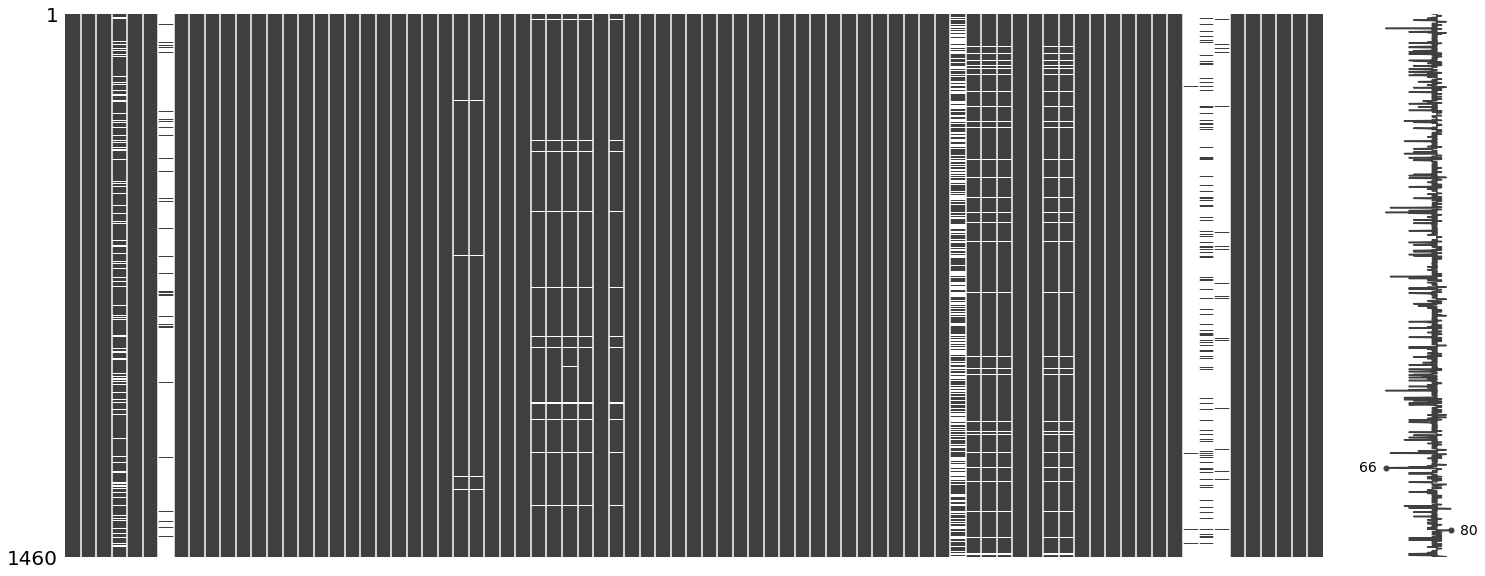

In [5]:
null_matrix = msno.matrix(data)

In [6]:
data_size = len(data.index)
index = data.columns.values
columns = ['Total', 'missing_ratio']
total = data.count().values
missing_ratio = 1 - total/data_size
input_data = np.stack((total, missing_ratio), axis = 1)
new_df = pd.DataFrame(data = input_data, index = index, columns= columns)
print(new_df.sort_values('missing_ratio', ascending=False))

              Total  missing_ratio
PoolQC          7.0       0.995205
MiscFeature    54.0       0.963014
Alley          91.0       0.937671
Fence         281.0       0.807534
FireplaceQu   770.0       0.472603
...             ...            ...
ExterQual    1460.0       0.000000
Exterior2nd  1460.0       0.000000
Exterior1st  1460.0       0.000000
RoofMatl     1460.0       0.000000
SalePrice    1460.0       0.000000

[81 rows x 2 columns]


In [7]:
inversed_df = data_size - new_df['Total']
new_df = new_df.drop(inversed_df[inversed_df >= 5].index.values)
print(new_df.sort_values('missing_ratio', ascending=False))

               Total  missing_ratio
Electrical    1459.0       0.000685
Fireplaces    1460.0       0.000000
1stFlrSF      1460.0       0.000000
2ndFlrSF      1460.0       0.000000
LowQualFinSF  1460.0       0.000000
...              ...            ...
BsmtFinSF1    1460.0       0.000000
BsmtFinSF2    1460.0       0.000000
BsmtUnfSF     1460.0       0.000000
TotalBsmtSF   1460.0       0.000000
SalePrice     1460.0       0.000000

[63 rows x 2 columns]


Problem 5:

# kurtosis
An index showing how sharp the distribution is.
The larger it is, the sharper it is. In the case of a normal distribution, kurtosis = 3.

Kurtosis > 0: Sharper than normal distribution.

Kurtosis < 0: Smoother than nomal distribution.

# skewness
An index that shows how much the distribution is shifted to the left or right with respect to the normal distribution.

Skewness > 0: Shifted to the right with respect to the normal distribution.

Skewness < 0: Shifted to the left with respect to the normal distribution.


Problem 6:


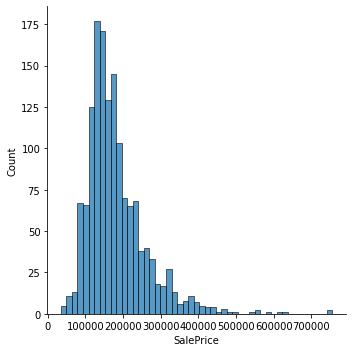

In [8]:
disp = sns.displot(df[target])

In [9]:
print('Skewness:',df[target].skew())
print('Kurtosis:',df[target].kurt())

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


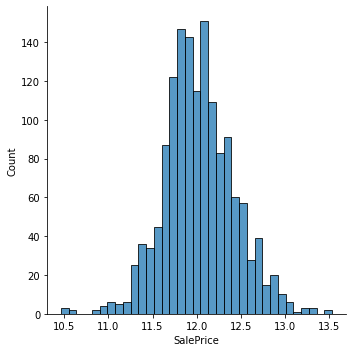

In [10]:
obj = np.log(df[target])
disp = sns.displot(obj)

In [11]:
print('Skewness:',obj.skew())
print('Kurtosis:',obj.kurt())

Skewness: 0.12133506220520406
Kurtosis: 0.8095319958036296



# Comparison before and after logarithmic transformation
By logarithmic conversion, we approached the normal distribution. 

Problem 7:

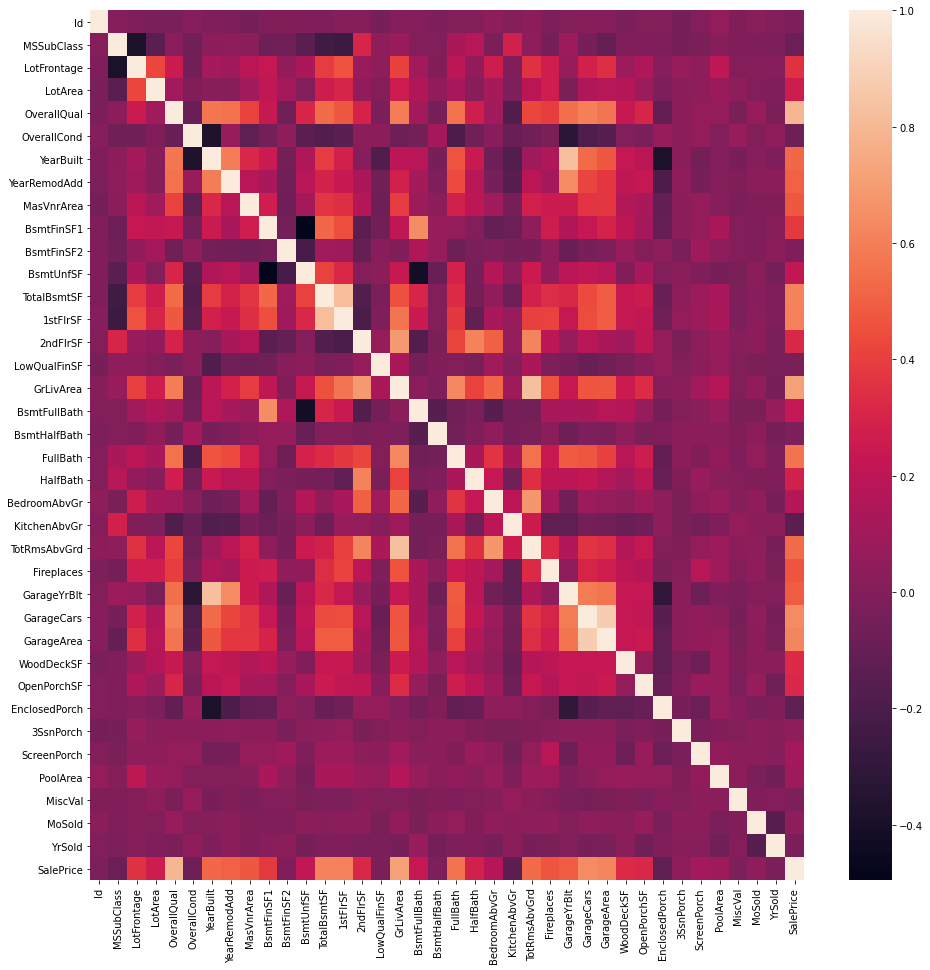

In [12]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(16,16))
heatmap = sns.heatmap(corr_matrix, ax=ax)

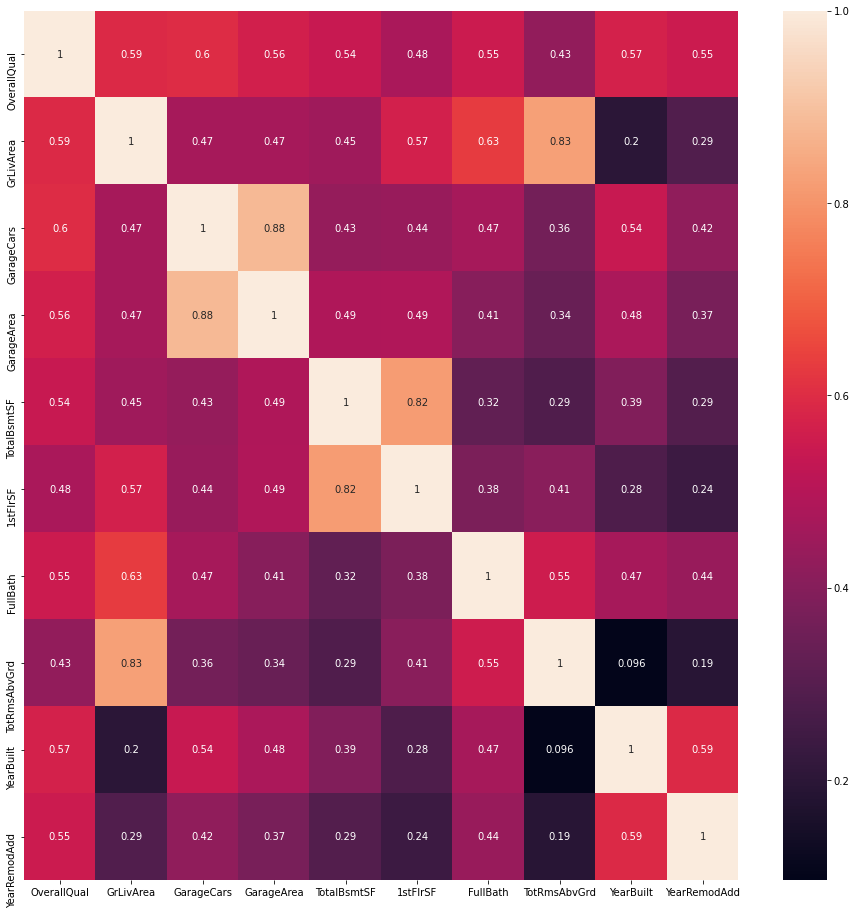

In [13]:
feature_name = list(corr_matrix[target].nlargest(11).iloc[1:].index)

new_df = df[feature_name]
corr_matrix2 = new_df.corr()
fig, ax = plt.subplots(figsize=(16,16))
tmp = sns.heatmap(corr_matrix2, annot=True)

# Summarize whether the 10 selected features represent something by referring to the description in Kaggle's DataDescription.

OverallQual: Overall material and finish quality ( HIGH )

GrLivArea: Above grade (ground) living area square feet

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

TotalBsmtSF: Total square feet of basement area ( HIGH )

1stFlrSF: First Floor square feet

FullBath: Full bathrooms above grade

TotRmsAbvGrd: Total rooms above grade

YearBuilt: When it was built

YearRemodAdd: Remodel date

# Find 3 combinations of the 10 selected features that have high correlation coefficients with each other.

GarageCars and GarageArea

1stFlrSF and TotalBsmtSF

TotRmsAbvGrd and GrLivArea

These 3 combinations are too highly correlated we have to take in consideration of multicolinearity. This can adversely affect our analysis